<a href="https://colab.research.google.com/github/adeolahaleem/Data-analysis-portfolio-/blob/main/AI_Powered_Data_Analysis_%26_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving raw_dataset_week_4.csv to raw_dataset_week_4.csv


In [3]:
import pandas as pd

df = pd.read_csv("raw_dataset_week_4.csv")

# Preview
df.head()


,Date,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,2024-04-12,1,56,Female,142418.0,7,391.0,8083.0,1,15376,3,Low,32526,0,0
1,2024-02-21,2,69,Male,63088.0,82,652.0,34328.0,2,6889,6,Low,78493,0,0
2,2024-04-02,3,46,Male,136868.0,91,662.0,47891.0,2,6054,29,Medium,57198,1,0
3,2024-01-15,4,32,Female,NaN,34,644.0,25103.0,2,4868,8,Medium,48395,0,0
4,2024-04-16,5,60,Male,59811.0,91,469.0,44891.0,1,17585,12,High,29031,1,0


In [8]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].median())
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].median())



In [9]:
df.drop_duplicates(inplace=True)
df.to_csv("cleaned_dataset.csv", index=False)
files.download("cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


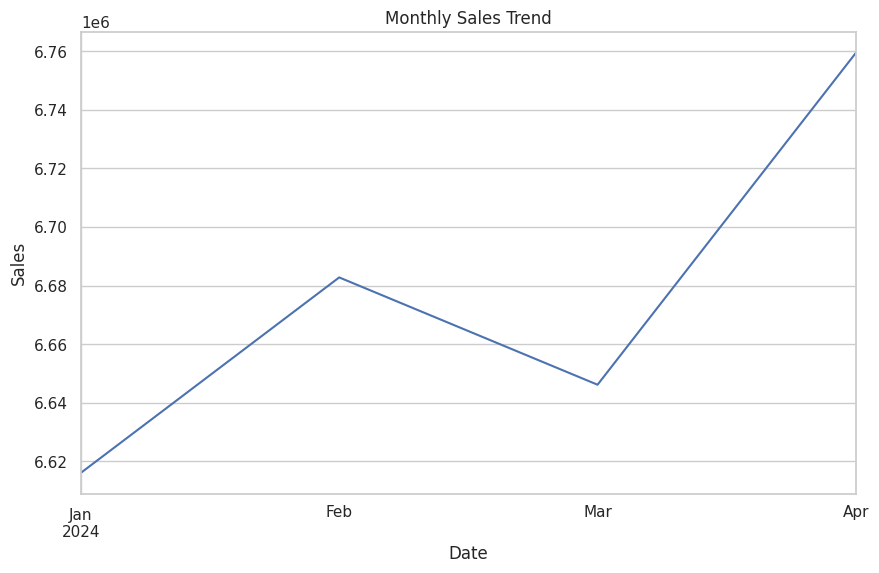

In [14]:
# Convert Date if not already
df['Date'] = pd.to_datetime(df['Date'])

# Monthly sales trend
df.set_index('Date')['Sales'].resample('ME').sum().plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()


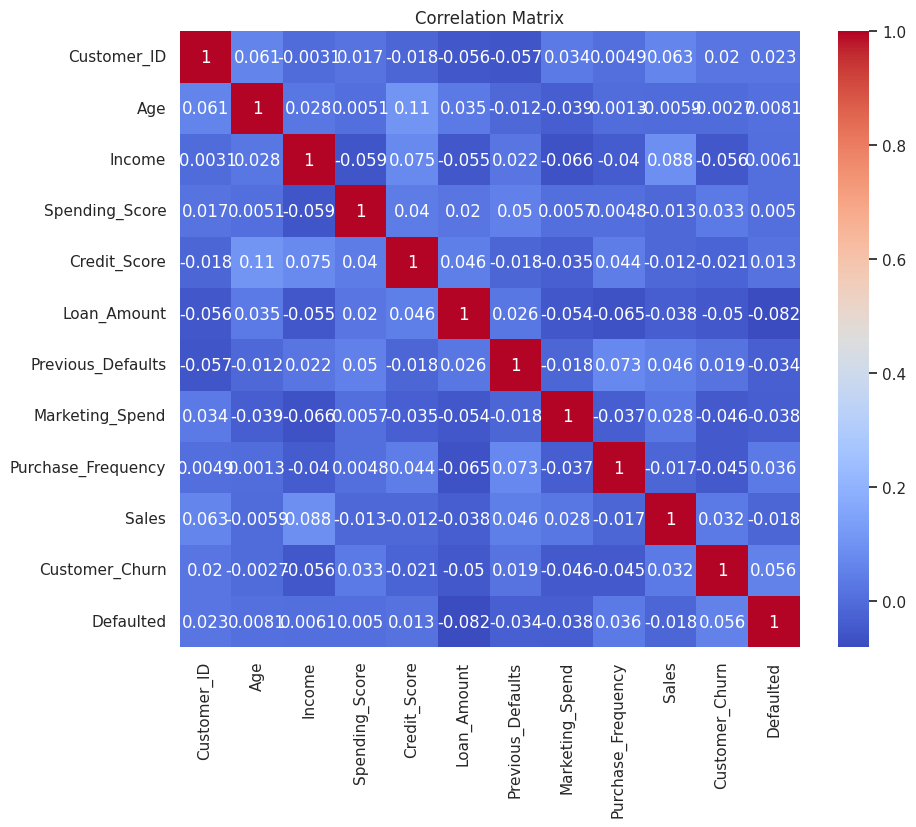

In [13]:
# Correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


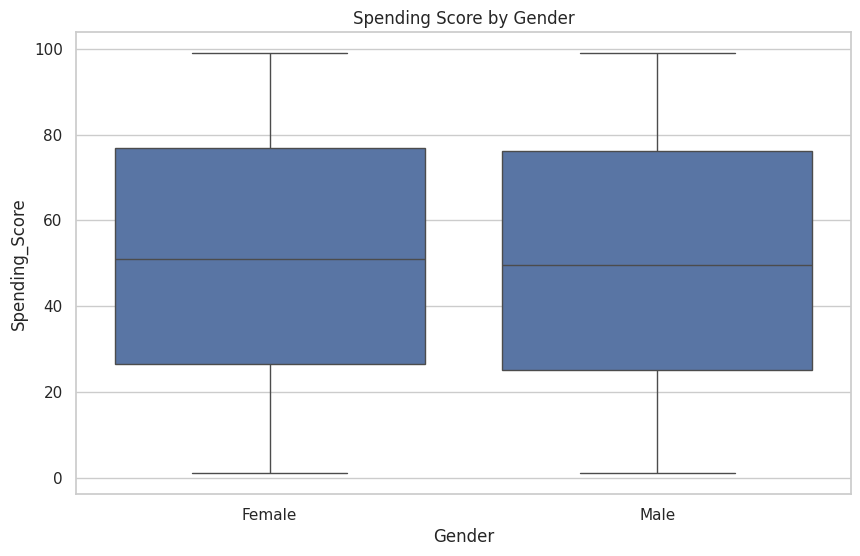

In [15]:
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title("Spending Score by Gender")
plt.show()


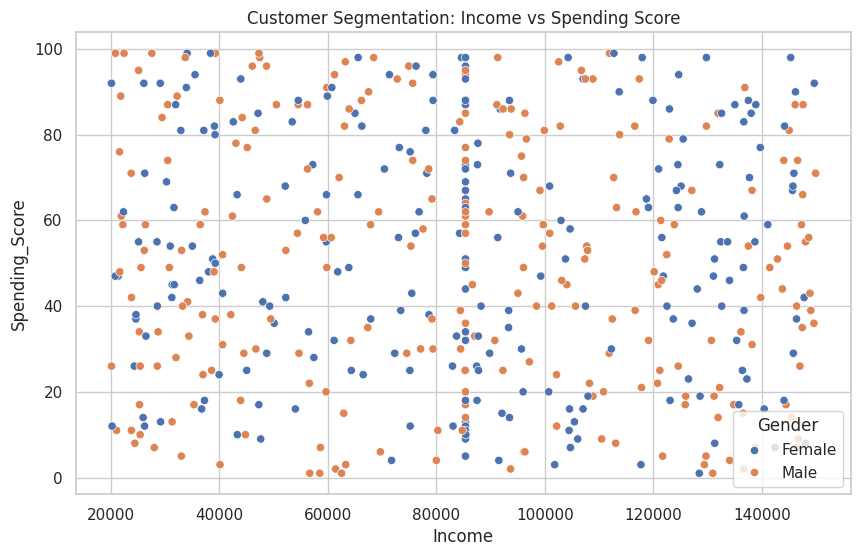

In [16]:
sns.scatterplot(data=df, x='Income', y='Spending_Score', hue='Gender')
plt.title("Customer Segmentation: Income vs Spending Score")
plt.show()


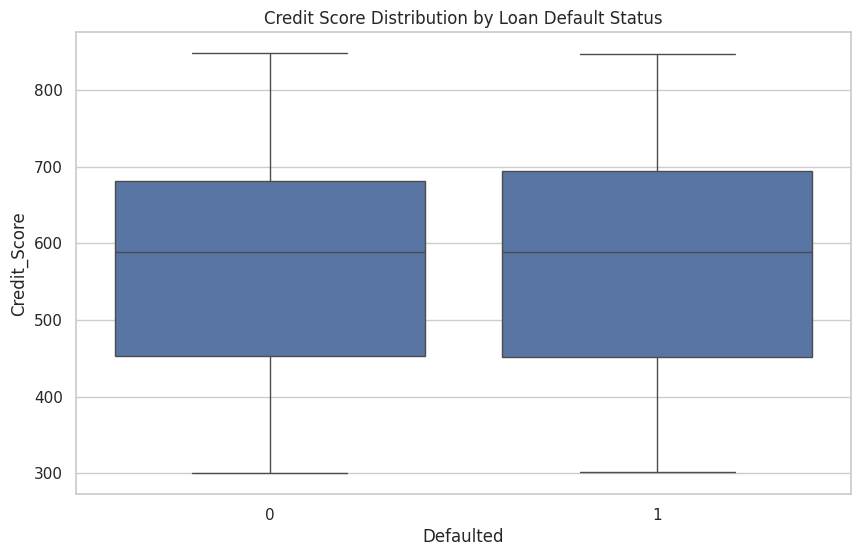

In [17]:
sns.boxplot(x='Defaulted', y='Credit_Score', data=df)
plt.title("Credit Score Distribution by Loan Default Status")
plt.show()


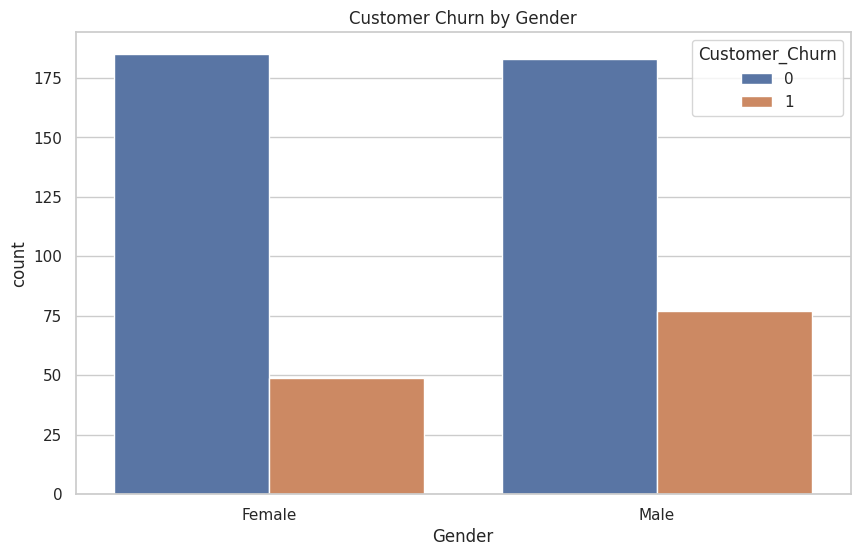

In [18]:
# Countplot of churn by gender
sns.countplot(data=df, x='Gender', hue='Customer_Churn')
plt.title("Customer Churn by Gender")
plt.show()